# 讀取所有資料夾中的檔案

In [1]:
import os
 
def file_name(file_dir): 
    L = [] 
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.csv':
                L.append(os.path.join(root, file))
    return L

In [2]:
file_path = file_name('/Users/Kang/Desktop/金融科技Final Project/SITCA_定期定額')
file_path

# 將資料夾中所有csv逐一讀入

In [3]:
import pandas as pd

In [4]:
d = ['類型代號',
 '基金統編',
 '基金名稱',
 '計價幣別',
 '基金規模(台幣)',
 '基金規模(原幣)',
 '單位淨值(台幣)',
 '單位淨值(原幣)',
 '本月定時定額扣款筆數',
 '本月定時定額扣款人數',
 '本月定時定額扣款金額(台幣)',
 '本月定時定額扣款金額(原幣)']

In [5]:
#以路徑名中最後的年月當作key，將總筆數、人數、金額當作value存入字典
total_d = {}
for i in range(len(file_path)):
    df = pd.read_csv(file_path[i], header = 1)
    df = df.drop(columns = '0')
    total_d[file_path[i][-10:-4]] = df[d[-4:-1]].loc[len(df)-1].tolist()

In [6]:
#把所有key轉為int並排大小，從最遠排到最近
all_year_month = []
for i in total_d.keys():
    all_year_month.append(int(i))
all_year_month.sort()

In [7]:
#將字典變成df並排列，這邊沒用到all_year_month
df1 = pd.DataFrame.from_dict(total_d, orient='index', columns = d[-4:-1])
df1.sort_index(inplace=True)

# 畫圖

In [8]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FuncFormatter
import numpy as np

In [9]:
#將all_year_month中的以排需年月轉為datetime型態，再丟回df1當index
datetime_year_month = [str(k)[:4] + '-' + str(k)[4:] for k in all_year_month]
df1.index = datetime_year_month
df1 = df1.set_index(pd.to_datetime(df1.index))
df1 = df1.resample('M').mean() #主要是用來把index的月初改成月底
df1

,本月定時定額扣款筆數,本月定時定額扣款人數,本月定時定額扣款金額(台幣)
2016-04-30,646740,494755,3339348556
2016-05-31,647841,491540,3320066240
2016-06-30,626222,482408,3220463290
2016-07-31,620540,478237,3204103712
2016-08-31,629334,479580,3270332585
2016-09-30,621588,476494,3227641830
2016-10-31,619047,473936,3180583198
2016-11-30,615909,470553,3205094427
2016-12-31,606144,466241,3149472672
2017-01-31,472237,385447,2420542262


In [10]:
font_noto_12 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 12)
font_noto_14 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 14)

In [11]:
#用來為y軸加上單位縮寫的函式
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["B", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print (val, signf)
                    if str(val).split(".")[1] == "0":
                        return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

In [12]:
from IPython.core.pylabtools import figsize
figsize(12, 8)

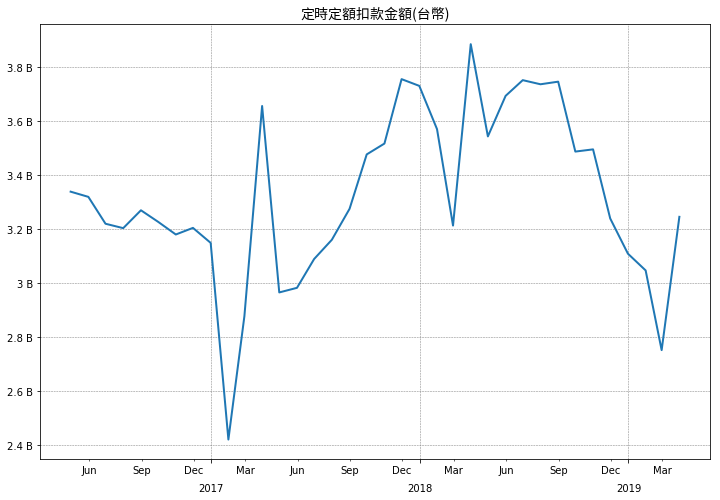

In [13]:
#畫金額圖
ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator([3, 6, 9, 12]))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(axis='x', pad=20)

ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

#figsize(9, 6)
plt.plot(df1['本月定時定額扣款金額(台幣)'], linewidth=2)
plt.title('定時定額扣款金額(台幣)', fontproperties = font_noto_14)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
#plt.style.use('seaborn-darkgrid')

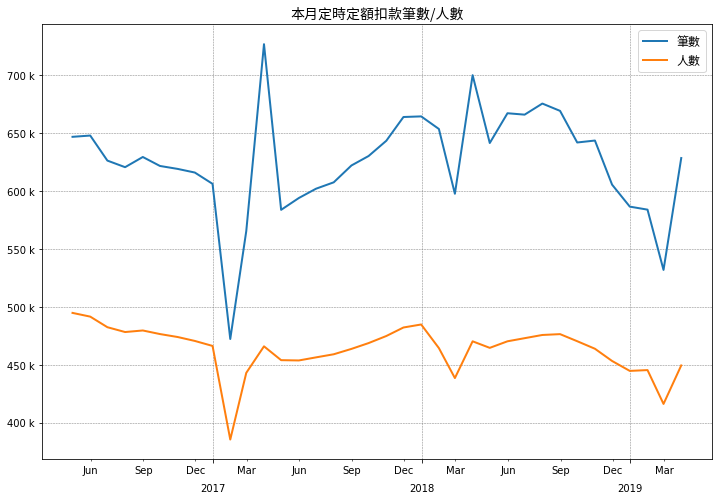

In [14]:
#畫筆數、人數圖
ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator([3, 6, 9, 12]))
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(axis='x', pad=20)

ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

#figsize(9, 6)
plt.plot(df1[['本月定時定額扣款筆數', '本月定時定額扣款人數']], linewidth=2)
plt.title('本月定時定額扣款筆數/人數', fontproperties = font_noto_14)
plt.legend(['筆數', '人數'], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
#plt.style.use('seaborn-darkgrid')

In [15]:
#列出有人定期定額的基金
df[df['本月定時定額扣款筆數']>0][:] 

,類型代號,基金統編,基金名稱,計價幣別,基金規模(台幣),基金規模(原幣),單位淨值(台幣),單位淨值(原幣),本月定時定額扣款筆數,本月定時定額扣款人數,本月定時定額扣款金額(台幣),本月定時定額扣款金額(原幣)
0,AA1,00965469,兆豐國際第一基金,TWD,448405578,0.0,12.2500,0.00,136,113,572000,0.0
1,AB1,00971976,兆豐國際萬全基金,TWD,270293484,0.0,18.0100,0.00,291,276,1142000,0.0
2,AA2,00992769,兆豐國際全球基金,TWD,1066039771,0.0,27.6700,0.00,1721,1567,7960000,0.0
3,AA1,01050148,兆豐國際國民基金,TWD,348197371,0.0,21.3800,0.00,92,86,347000,0.0
4,AA1,10341837,兆豐國際豐台灣基金,TWD,418142533,0.0,27.6000,0.00,482,407,2241000,0.0
5,AA2,14699772,兆豐國際生命科學基金,TWD,271682629,0.0,16.5300,0.00,699,621,3242000,0.0
7,AA2,25637773,兆豐國際綠鑽基金,TWD,108963303,0.0,7.2800,0.00,167,145,735000,0.0
8,AA2,26278352,兆豐國際全球高股息基金,TWD,137640252,0.0,10.0200,0.00,270,246,1049000,0.0
9,AA2,26299315,兆豐國際民生動力基金,TWD,134424744,0.0,10.1800,0.00,79,70,322000,0.0
10,AE22,31829638A,兆豐國際全球債券組合基金A(累積型),TWD,13611986,0.0,10.8000,0.00,15,15,55000,0.0


In [16]:
#列出所有元大基金
df[df['基金名稱'].str.contains("元大")]

,類型代號,基金統編,基金名稱,計價幣別,基金規模(台幣),基金規模(原幣),單位淨值(台幣),單位淨值(原幣),本月定時定額扣款筆數,本月定時定額扣款人數,本月定時定額扣款金額(台幣),本月定時定額扣款金額(原幣)
106,AA1,00974066,元大2001基金,TWD,1361316878,0.0,55.6900,0.000,2963,2217,13996498,0.0
107,AA1,01032058,元大多福基金,TWD,3306111175,0.0,52.9800,0.000,8151,6731,38948375,0.0
108,AA2,10348058,元大全球農業商機基金,TWD,636353483,0.0,16.0600,0.000,1676,1356,7291919,0.0
109,AD1,13530495,元大得寶貨幣市場基金,TWD,20940063509,0.0,11.9001,0.000,18,9,50176000,0.0
110,AA1,14542287,元大精準中小基金,TWD,560665301,0.0,19.2100,0.000,486,377,2274105,0.0
111,AA1,17139204,元大新主流基金,TWD,2911870480,0.0,20.6300,0.000,4029,3533,18016512,0.0
112,AA1,18036281,元大巴菲特基金,TWD,576269272,0.0,25.0900,0.000,1790,1464,8287200,0.0
113,AA1,20080023,元大店頭基金,TWD,1314402022,0.0,7.6800,0.000,1234,1100,5116913,0.0
114,AD1,20081331,元大萬泰貨幣市場基金,TWD,32462477273,0.0,15.0008,0.000,276,253,4135000,0.0
115,AG,21718388A,元大全球不動產證券化基金(A)-不配息型,TWD,1382132415,0.0,10.8300,0.000,965,687,5010665,0.0


In [20]:
df1.to_csv('/Users/Kang/Desktop/periodic_invest.csv', encoding = 'big5hkscs')